# An Introduction to analyzing Formamentis Networks using emoatlas


❗ **If this is the first time you're using EmoAtlas, it is suggest to consult the Starting_guide.ipynb before reading this notebook ([Github link](https://github.com/alfonsosemeraro/emoatlas/blob/main/demos/Starting_guide.ipynb)).** ❗



In this introduction, we will see what functions are offered by emoatlas for the analysis of Formamentis Networks.

It is important to note that this notebook will deal with analysis techniques from a high-level perspective and not a statistical one. Its scope will be limited to showing examples of some analysis techniques for analyzing these TFMN (Textual forma mentis networks). There are many techniques that have been developed for network analysis, so the reader is invited to consult existing literature for further techniques and methods.

If you are interested in a more sophisticated article of what is possible with EmoAtlas, please refer to [Social discourse and reopening after COVID-19: A post-lockdown analysis of flickering emotions and trending stances in Italy](https://firstmonday.org/ojs/index.php/fm/article/download/10881/9987).

---



## Setup

We start by importing the packages and by importing a demo file with sample texts.

In [17]:
# Importing packages
from emoatlas import EmoScores
import pandas as pd
import os
import json

In [18]:
# Importing the text file.

parent_directory = os.path.dirname(os.getcwd())
file_path = os.path.join(parent_directory,'sample_texts', 'bob_dylan.json')

# Opening Json file:
with open(file_path, 'r') as file:
    data = json.load(file)

## Importing the first 50 songs to analyze
text_lists = [song['text'] for song in data]
text_lists = text_lists[:50]
sample_text = '\n'.join(text_lists)

If you are interested in a csv file, you could the ```.read_csv``` method of pandas.

In [19]:
## Replace 'your_file_path.csv' with the actual path to your CSV file
#file_path = 'your_file_path.csv'
#
## Read the CSV file into a pandas DataFrame
#df = pd.read_csv(file_path)

After importing the data, we have to define an instance of the class ```EmoScores()```, this class has been documented in the starting_guide.

In [20]:
emos = EmoScores()

## Why are analysis techniques necessary?

Formamentis networks can be analysed visually, however, when a lot of text is present, more sophisticated analysis techniques become indispensable. This is easily seen if we plot the network.

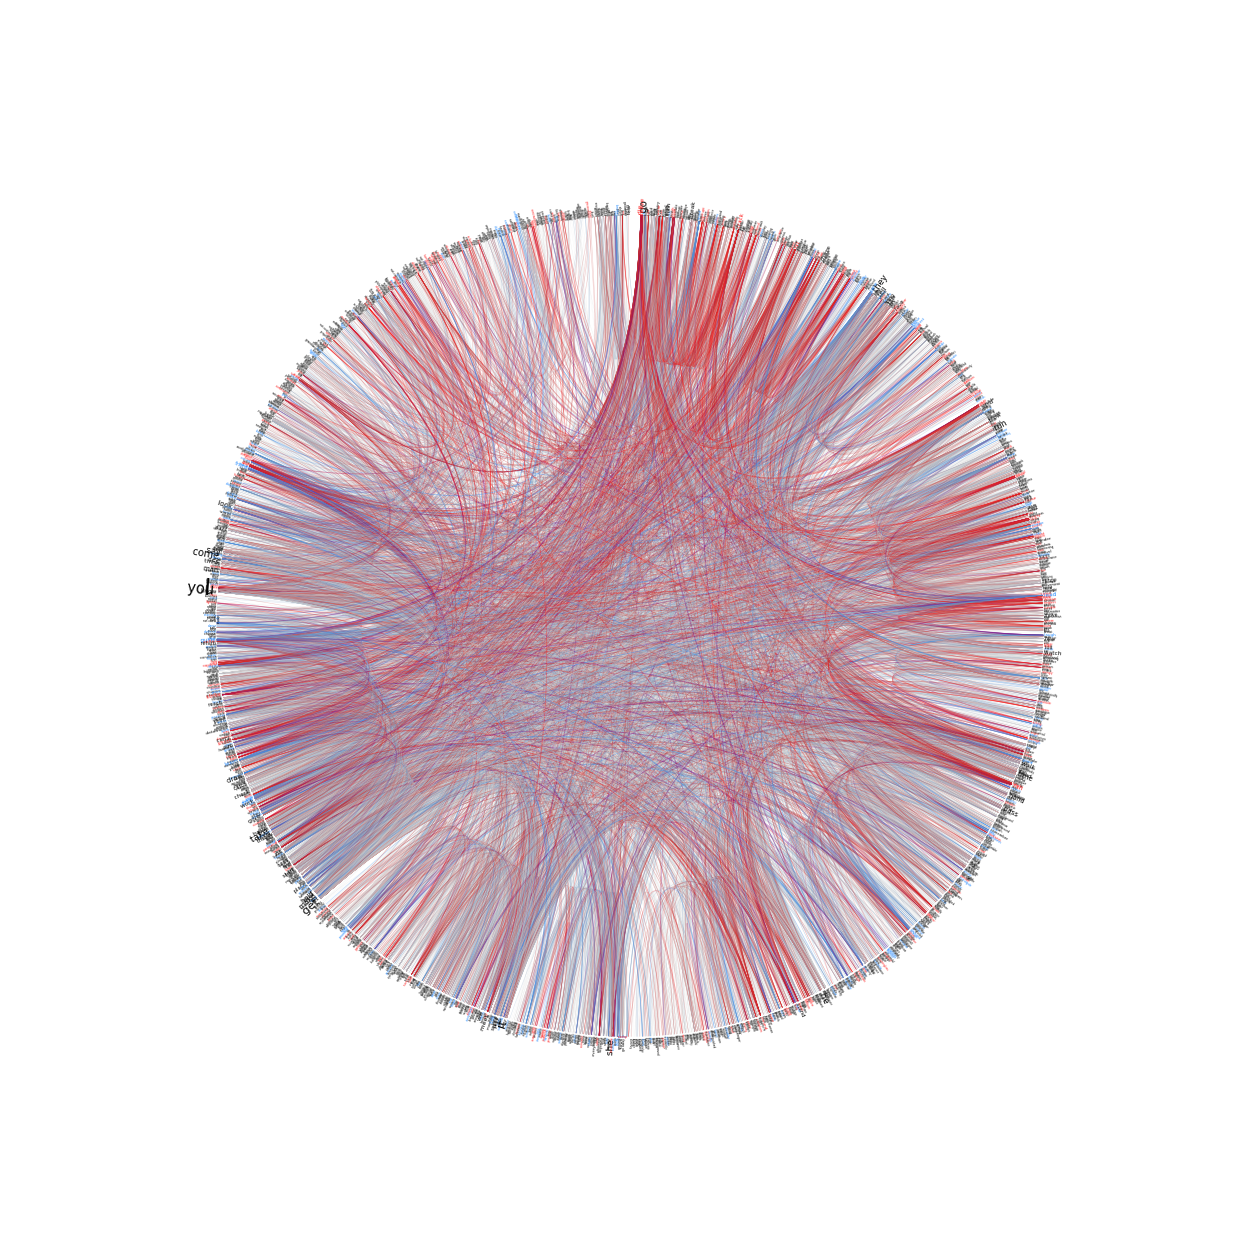

In [21]:
fmnt = emos.formamentis_network(sample_text) 
emos.draw_formamentis(fmnt,thickness=0.2,alpha_syntactic=0.4)

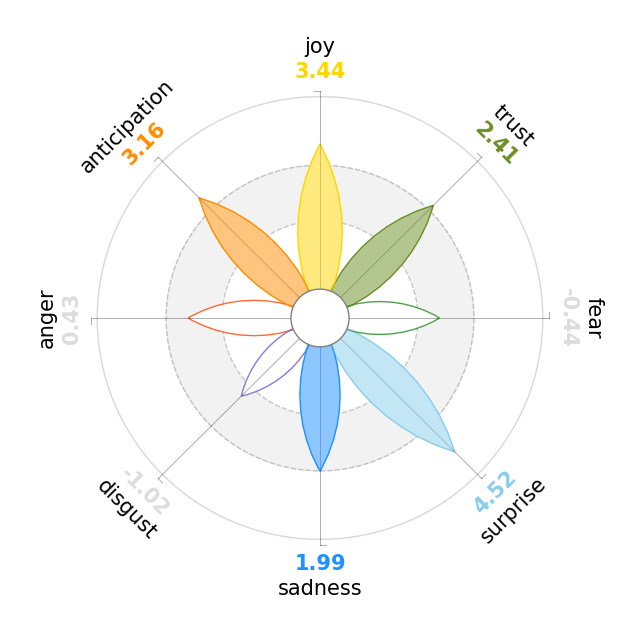

In [22]:
emos.draw_statistically_significant_emotions(sample_text)

---

# Utilities

### Getting edgelists
Depending on the type of analysis you want to perform with the networks, it may be useful to have access to the edgelist and vertices. Returning these elements is quite easy: once the fmnt is defined, it will only be necessary to use ```.edges``` or ```.vertices``` .

In [23]:
# We will see that fmnt is a Named Tuple of edges and vertices.
demo_text = """In this text, we prefer dogs becase they are happy. And even if some hounds can be aggressive, I do love our canine friends."""
fmnt_demo = emos.formamentis_network(demo_text, semantic_enrichment='synonyms', multiplex=True) 

print(fmnt_demo)

FormamentisNetwork(edges={'syntactic': [('prefer', 'they'), ('text', 'we'), ('dog', 'they'), ('happy', 'they'), ('happy', 'prefer'), ('happy', 'we'), ('friend', 'hound'), ('canine', 'friend'), ('dog', 'prefer'), ('prefer', 'text'), ('dog', 'text'), ('prefer', 'we'), ('dog', 'we'), ('they', 'we'), ('dog', 'happy'), ('I', 'love'), ('friend', 'love'), ('hound', 'love'), ('aggressive', 'love'), ('canine', 'love'), ('aggressive', 'hound'), ('I', 'hound'), ('I', 'aggressive'), ('I', 'friend'), ('aggressive', 'friend'), ('I', 'canine')], 'synonyms': [('dog', 'hound')]}, vertices=['love', 'happy', 'canine', 'aggressive', 'text', 'they', 'prefer', 'I', 'dog', 'friend', 'hound', 'we'])


In [24]:
fmnt = emos.formamentis_network(sample_text) 
# Returns a list of all the edges
print(fmnt.edges[0:5])
# Returns a list of all the vertices.
print(fmnt.vertices[0:5])

[('know', 'you'), ('I', 'know'), ('I', 'hate'), ('I', 'you'), ('hate', 'you')]
['neglect', 'adam', 'subway', 'present', 'cap']


If you are interested in representing also non-syntactic relationships, **multiplex must be set to True** and you need to specify the relationships with **semantic_enrichment**.

After doing so, fmnt will be a dictionary of edgelists, as such, you will need to index this dictionary as is done in the example below:

In [25]:
fmnt = emos.formamentis_network(sample_text, semantic_enrichment=['synonyms','hypernyms'],multiplex=True) 
fmnt.edges['synonyms'][0:5] #getting the synonyms edgelist.

[('bar', 'block'),
 ('carry', 'custody'),
 ('life', 'lifetime'),
 ('persuade', 'sway'),
 ('degree', 'peak')]

### Getting a lemmatized text

It must be remarked that the formamentis networks of emoatlas are always generated from text, which can still be analysed quantitatively. Some analyses may thus require the text used by the library and not the network itself.

To facilitate these analyses, emoatlas has a function ```lemmatize_text()``` that returns a list of lemmatized words following the same procedure as emoatlas. You need to import it from *textloader.py*.

This function requires a formamentis network to be already defined. It supports the removal of stopwords - it does by default.

In [26]:
from emoatlas.textloader import lemmatize_text

lemmatized_text = lemmatize_text(sample_text, 
                                 remove_stopwords = True) # The default of remove_stopwords is already True, this is just an example.

print(lemmatized_text[:15])

TypeError: lemmatize_text() got an unexpected keyword argument 'remove_stopwords'

---
---
---


# Metrics


## Frequency of words

**Frequency** is a metric that indicates how many times single words appear in a dataset. While it may appear to be a pretty simple metric, the information it provides can be very relevant.

Frequency can be easily computed. This example uses the popular library pandas do so.

In [ ]:
# Create a DataFrame from the list of lemmatized words
df_frequency = pd.DataFrame(lemmatized_text, columns=['Word'])

# Count the occurrences of each word and sort by count
word_counts = df_frequency['Word'].value_counts().reset_index()
word_counts.columns = ['Word', 'Count']

# Display the first 15 most common words
display(word_counts.head(15))

,Word,Count
0,",",1406
1,I,741
2,be,710
3,the,705
4,.,658
5,and,406
6,you,339
7,to,325
8,a,323
9,my,216


## Node degree

The degree of a node measures the number of links a node has within a network. Nodes with higher degrees often play a crucial role in the information of the text. To compute the nodes with more degrees, we can use **networkx**, a popular package (and a dependency of emoatlas) that supports many operations for networks analysis.



In [ ]:
import networkx as nx

In [ ]:
fmnttest = emos.formamentis_network(sample_text, semantic_enrichment='synonyms', multiplex=False)

# Creating a graph
G = nx.Graph()
G.add_edges_from(fmnttest)

In [ ]:
# Compute the degree of each node in the graph
degree = dict(G.degree())

# Convert the dictionary to a DataFrame
degree_df = pd.DataFrame(list(degree.items()), columns=['Node', 'Degree'])

# Sort the DataFrame by degree in descending order
degree_df = degree_df.sort_values(by='Degree', ascending=False)

display(degree_df.head(15))


## Closeness centrality



In [ ]:


# Compute closeness centrality for each node in the graph
closeness_centrality = nx.closeness_centrality(G)

# Convert the dictionary to a DataFrame
closeness_df = pd.DataFrame(list(closeness_centrality.items()), columns=['Node', 'Closeness Centrality'])

# Sort the DataFrame by closeness centrality in descending order
closeness_df = closeness_df.sort_values(by='Closeness Centrality', ascending=False)

display(closeness_df.head(15))

------
------
------
------

# Work in progress

- Analyzing single words with plutchik and fmnt


- closeness centrality: inverso distanza media fra un nodo e qualsiasi altro nodo adesso connesso ad esso

